# Perceptron

based off of: https://en.wikipedia.org/wiki/Perceptron

First we generate random data (e.g. from a normal distribution) accross `x1` and `x2` variables. Then we generate an arbitrary linear separation between them to create the output label (e.g. when `x1 == x2`).

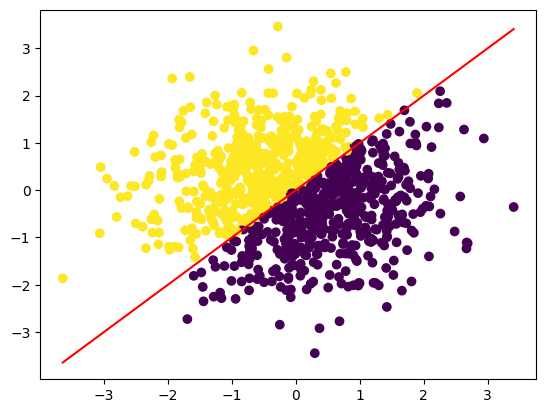

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(69) # keep this for reproducibility

N = 1000 # number of samples

# generate random data from a normal distribution with mean 0.0 and std 1.0
# the shape is (N, 2): N samples of 2 variables (`x1` and `x2`)
data = np.random.normal(loc=0.0, scale=1.0, size=(N, 2))
labels = data[:, 0] < data[:, 1] # for each `x1` and `x2` give it a label: divide accross the line `x1 = x2`
plt.scatter(data[:, 0], data[:, 1], c=labels);

sep = np.linspace(data[:, 0].min(), data[:, 0].max(), num=N)
plt.plot(sep, sep, color="red");

In [2]:
# simple and fast train/test split but final size varies slightly due to randomness
TEST_SIZE = 0.33

mask = np.random.rand(N) < TEST_SIZE

X_train, y_train = data[~mask], labels[~mask]
X_test, y_test = data[mask], labels[mask]

print(f"train: {len(y_train)}; test: {len(y_test)}")

train: 679; test: 321


For training, the $x$ input is extended to make room for the bias parameter as it is a very common convention. But the bias parameter could be used seperately on its own to avoid copying the input.

A convergance loop is used because the data is linearly separable, so we are guaranteed to reach a perfect solution. If the data wasn't linearly separable this would loop forever.

In [3]:
lr = 0.10 # learning rate

x = np.pad(X_train, ((0, 0), (1, 0)), constant_values=1) # extend the beginning of the second dimension with a 1 (input for the bias parameter)
w = np.zeros(X_train.shape[1] + 1)

errors = N
while errors > 0:
  errors = 0
  for i in range(X_train.shape[0]):
    y = np.astype(x[i] @ w > 0, int)
    err = y_train[i] - y # predicion error
    w += lr * err * x[i] # weight update rule
    errors += int(err > 0)

h = ("b", "w1", "w2")
print(" | ".join(f"{n:>8s}" for n in h))
print(" | ".join(f"{v:8.4f}" for v in w))

       b |       w1 |       w2
  0.0000 |  -0.6225 |   0.6152


To plot the computed division as a line over the traning data we can write $x_2$ in terms of $x_1$ and $b$:

$$
\begin{aligned}
    b + w_1 \cdot x_1 + w_2 \cdot x_2 &= 0 \\
    w_2 \cdot x_2 &= -b -w_1 \cdot x_1 \\
    x_2 &= -\frac{b + w_1 \cdot x_1}{w_2} \\
    x_2 &= -\frac{b}{w_2} + \frac{w_1}{w_2} \cdot x_1
\end{aligned}
$$


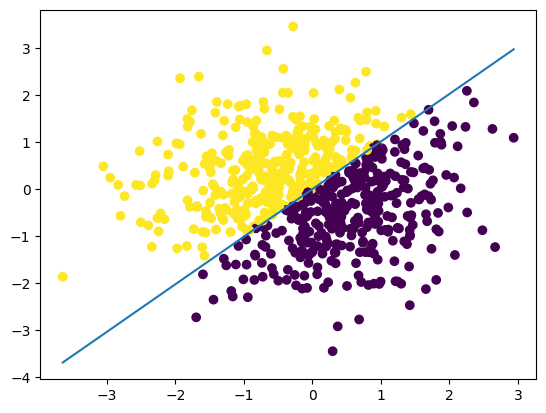

In [4]:
coeffs = -(w / w[-1]) # divide by w2 to isolate x2
b, w1 = coeffs[0], coeffs[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

x1 = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=N)
x2 = b + w1 * x1
plt.plot(x1, x2);

Now we can evaluate the perceptron model using the test split and calculate the error (e.g. Mean Squared Error). For this simple example it should be, or very close to, zero.

In [5]:
x = np.pad(X_test, ((0, 0), (1, 0)), constant_values=1)
y = np.astype((x @ w) > 0, int)

mse = np.pow(y_test - y, 2).mean()
print(f"mse: {mse:6.4f}")

mse: 0.0000
